<a href="https://colab.research.google.com/github/rahiakela/computer-vision-research-and-practice/blob/main/hands-on-computer-vision-with-detectron2/04-detectron2-architecture/01_detectron2_architecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Detectron2 architecture

The object detection model in Detectron2 is the implementation of Faster R-CNN. Specifically, this architecture includes the backbone network, the region proposal network, and the region of interest heads.

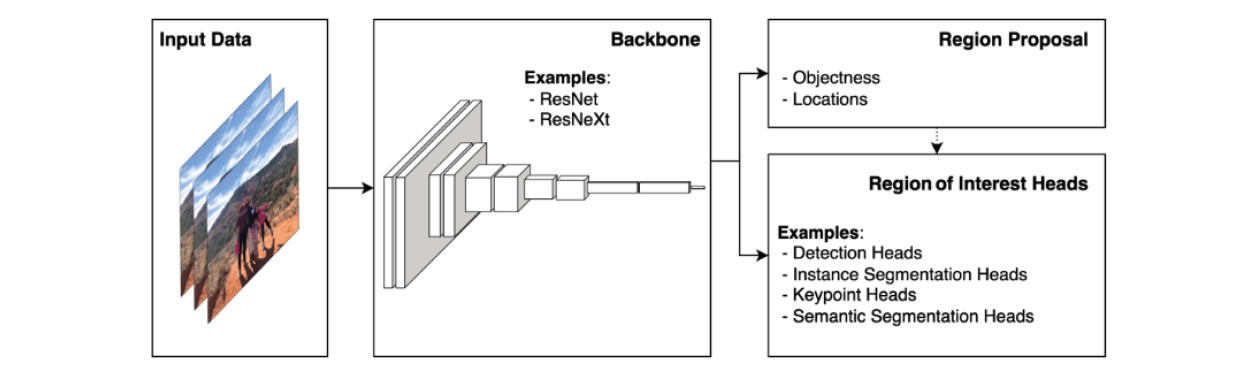

- The backbone network includes several convolutional layers that help to perform feature extraction from the input image.
- The region proposal network is another neural network that predicts the proposals with objectness and locations of the objects before feeding to the next stage.
- The region of interest heads have neural networks for object localization and classification.



##Setup

In [ ]:
!python -m pip install "git+https://github.com/facebookresearch/detectron2.git"

In [5]:
import detectron2
from detectron2.config import get_cfg
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog

import torch
import cv2
from google.colab.patches import cv2_imshow

# Suppress some user warnings
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)

In [3]:
print(detectron2.__version__)

0.6


In [ ]:
!wget https://github.com/PacktPublishing/Hands-On-Computer-Vision-with-Detectron2/raw/main/datasets/800x800image/input.jpeg

##Pre-trained model

In [6]:
# Select a model
config_file_path = "COCO-Detection/faster_rcnn_R_50_C4_1x.yaml"
checkpoint_url = "COCO-Detection/faster_rcnn_R_50_C4_1x.yaml"
score_thresh_test = 0.95

# Create a configuration file
config = get_cfg()
config_file = model_zoo.get_config_file(config_file_path)
config.merge_from_file(config_file)

# Download weights
config.MODEL.WEIGHTS = model_zoo.get_checkpoint_url(checkpoint_url)
config.MODEL.ROI_HEADS.SCORE_THRESH_TEST = score_thresh_test
predictor = DefaultPredictor(config)

model_final_721ade.pkl: 136MB [00:00, 194MB/s]                           


##Input image

In [7]:
img = cv2.imread("input.jpeg")
height, width = img.shape[:2]
image = torch.as_tensor(img.astype("float32").transpose(2, 0, 1))

In [8]:
image

tensor([[[199., 199., 199.,  ..., 203., 203., 203.],
         [199., 199., 199.,  ..., 203., 203., 203.],
         [199., 199., 199.,  ..., 204., 204., 204.],
         ...,
         [ 73.,  90.,  91.,  ...,  95.,  92.,  91.],
         [ 87.,  88.,  86.,  ...,  92.,  93.,  93.],
         [ 81.,  78.,  84.,  ...,  83.,  89.,  90.]],

        [[147., 147., 147.,  ..., 144., 144., 144.],
         [147., 147., 147.,  ..., 144., 144., 144.],
         [147., 147., 147.,  ..., 145., 145., 145.],
         ...,
         [114., 131., 133.,  ..., 137., 134., 133.],
         [131., 132., 130.,  ..., 133., 134., 134.],
         [125., 122., 128.,  ..., 124., 127., 128.]],

        [[106., 106., 106.,  ..., 104., 104., 104.],
         [106., 106., 106.,  ..., 104., 104., 104.],
         [106., 106., 106.,  ..., 105., 105., 105.],
         ...,
         [206., 223., 222.,  ..., 233., 230., 229.],
         [222., 223., 221.,  ..., 226., 227., 227.],
         [216., 213., 219.,  ..., 217., 221., 222.]]]

##Backbone network

##Visualizing the results

In [ ]:
output["sem_seg"].shape

torch.Size([54, 720, 960])

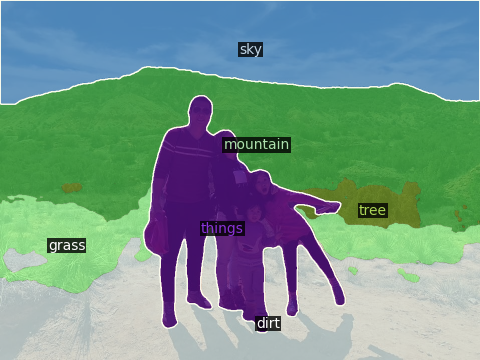

In [ ]:
metadata = MetadataCatalog.get(config.DATASETS.TRAIN[0])

visualizer = Visualizer(img[:, :, ::-1], metadata, scale=0.5)
sem_seg = output["sem_seg"].argmax(dim=0)
annotated_img = visualizer.draw_sem_seg(sem_seg.to("cpu"))  # annotate the predicted instances to the image
cv2_imshow(annotated_img.get_image()[:, :, ::-1])

In [ ]:
img = cv2.imread("img2.jpeg")
output = predictor(img)

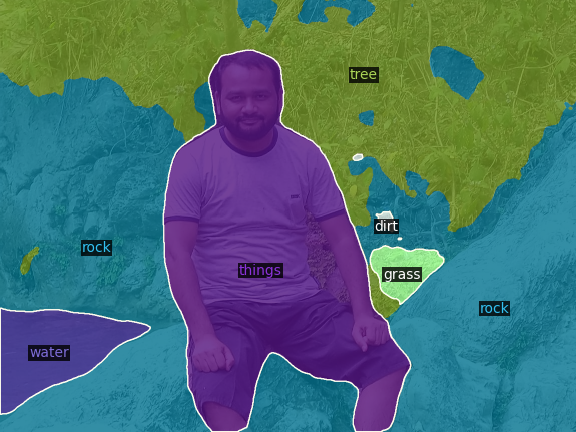

In [ ]:
metadata = MetadataCatalog.get(config.DATASETS.TRAIN[0])

visualizer = Visualizer(img[:, :, ::-1], metadata, scale=0.5)
sem_seg = output["sem_seg"].argmax(dim=0)
annotated_img = visualizer.draw_sem_seg(sem_seg.to("cpu"))  # annotate the predicted instances to the image
cv2_imshow(annotated_img.get_image()[:, :, ::-1])